# Triple Decomposition Test

This notebook is about DESCRIBE

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

In [45]:
#ds = xr.open_dataset("/swot/SUM05/amf2288/sync-boxes/castro2024")
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-20)_lat:(-70,70)_ds_z.nc')

In [46]:
lfilt = 200

ct_b = ds.CT
sa_b = ds.SA

ct_m = ff.get_filt_single(ds, lfilt, 'CT')
sa_m = ff.get_filt_single(ds, lfilt, 'SA')

ct_e = ct_b - ct_m
sa_e = sa_b - sa_m

In [47]:
K_rho4 = 10**(-4)
K_rho5 = 10**(-5)
K_rho6 = 10**(-6)

In [48]:
ct_2 = K_rho5*(ct_e.differentiate(coord='PRES_INTERPOLATED'))**2
sa_2 = K_rho5*(sa_e.differentiate(coord='PRES_INTERPOLATED'))**2

ct_3 = K_rho5*(ct_m.differentiate(coord='PRES_INTERPOLATED'))**2
sa_3 = K_rho5*(sa_m.differentiate(coord='PRES_INTERPOLATED'))**2

### Conservative Temperature (CT)

/home.ufs/amf2288/mambaforge-pypy3/envs/Argo_Nov_24/lib/python3.12/site-packages/xarray/core/computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home.ufs/amf2288/mambaforge-pypy3/envs/Argo_Nov_24/lib/python3.12/site-packages/xarray/core/computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


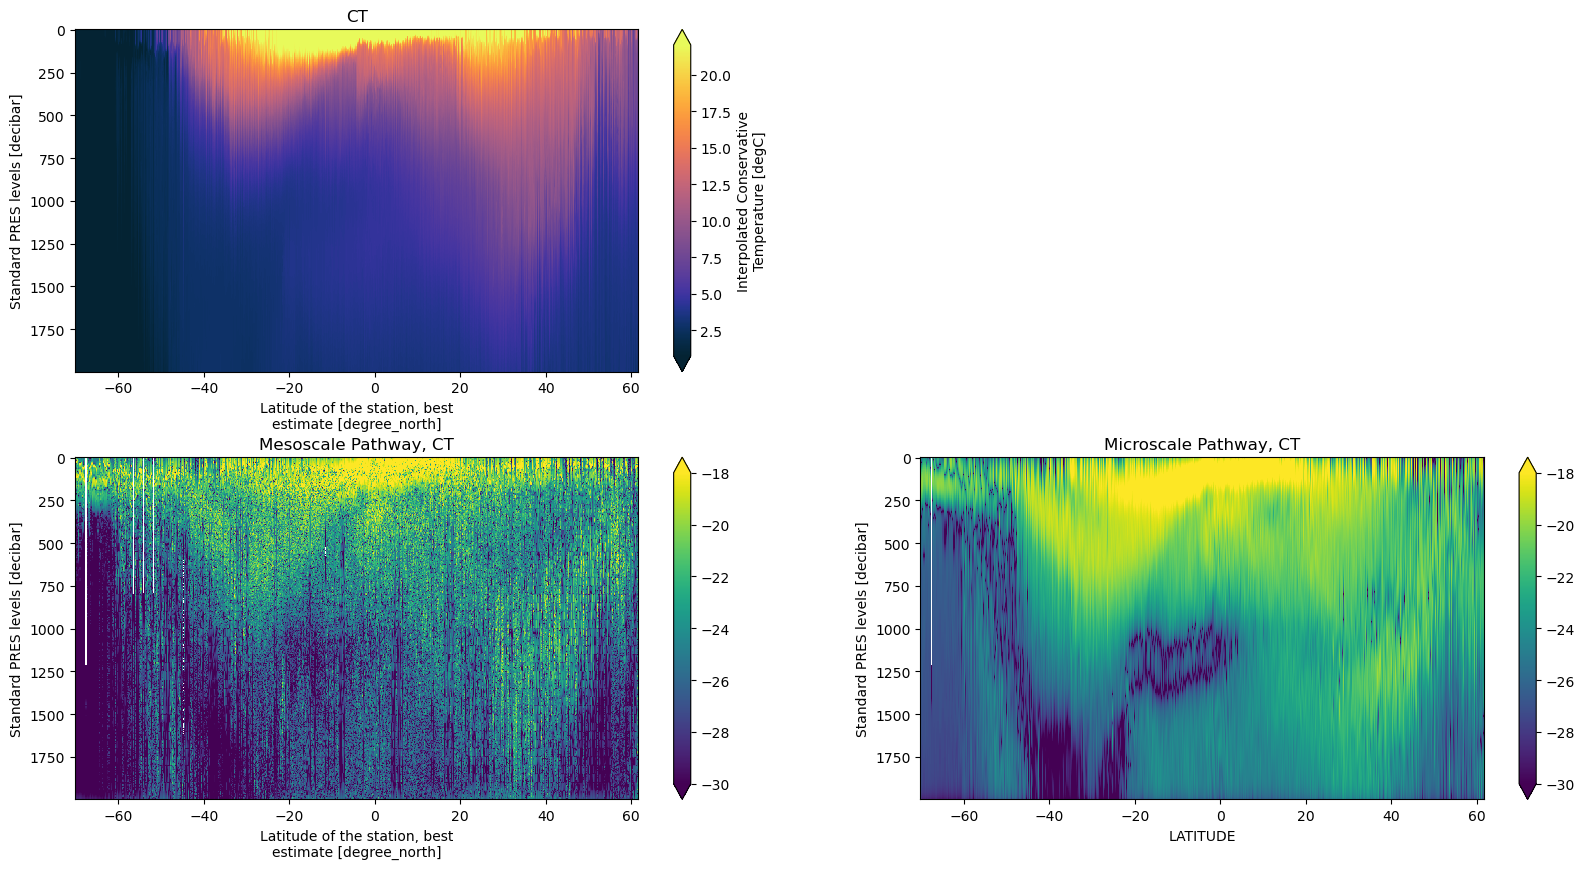

In [58]:
x='LATITUDE'
y='PRES_INTERPOLATED'

plt.figure(figsize=(20,10))

plt.subplot(221)
ds.CT.sortby(x).plot(x=x, y=y, cmap=cmo.thermal, robust=True)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(223)
np.log(ct_2).sortby(x).plot(x=x, y=y, robust=True, vmax=-18, vmin=-30)
plt.gca().invert_yaxis()
plt.title('Mesoscale Pathway, CT')

plt.subplot(224)
np.log(ct_3).sortby(x).plot(x=x, y=y, robust=True, vmax=-18, vmin=-30)
plt.gca().invert_yaxis()
plt.title('Microscale Pathway, CT')

plt.subplots_adjust(hspace=0.25)

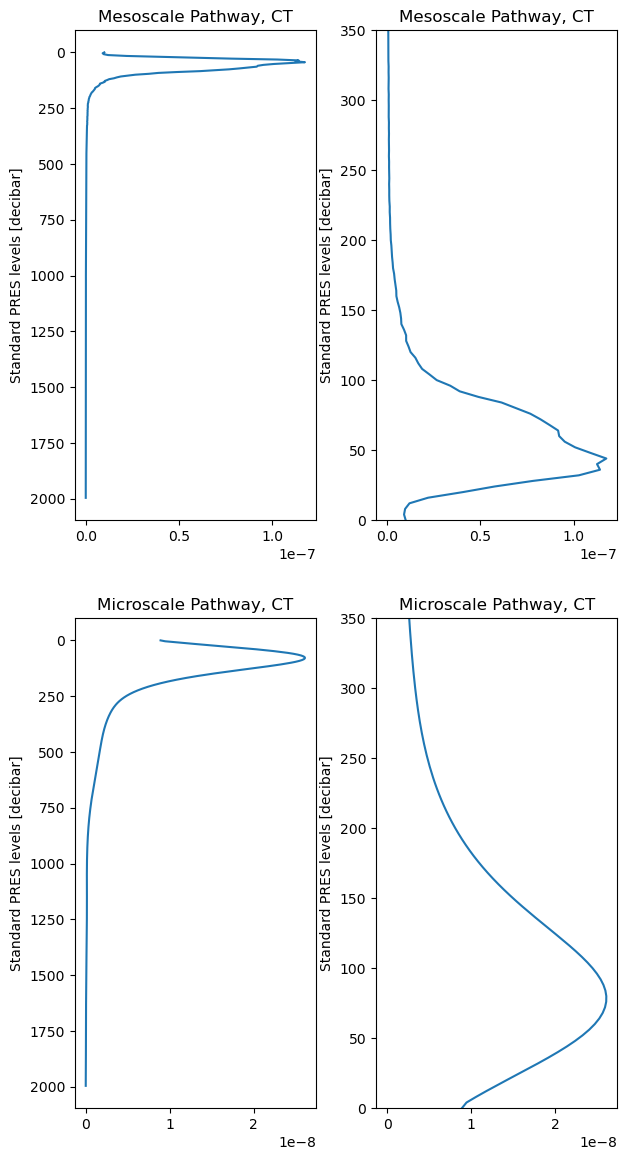

In [50]:
plt.figure(figsize=(7,14))

plt.subplot(221)
ct_2.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.title('Mesoscale Pathway, CT')

plt.subplot(222)
ct_2.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.ylim(0,350)
plt.title('Mesoscale Pathway, CT')

plt.subplot(223)
ct_3.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.title('Microscale Pathway, CT')

plt.subplot(224)
ct_3.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.ylim(0,350)
plt.title('Microscale Pathway, CT')

plt.subplots_adjust(wspace=0.25)

### Absolute Salinity

/home.ufs/amf2288/mambaforge-pypy3/envs/Argo_Nov_24/lib/python3.12/site-packages/xarray/core/computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home.ufs/amf2288/mambaforge-pypy3/envs/Argo_Nov_24/lib/python3.12/site-packages/xarray/core/computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


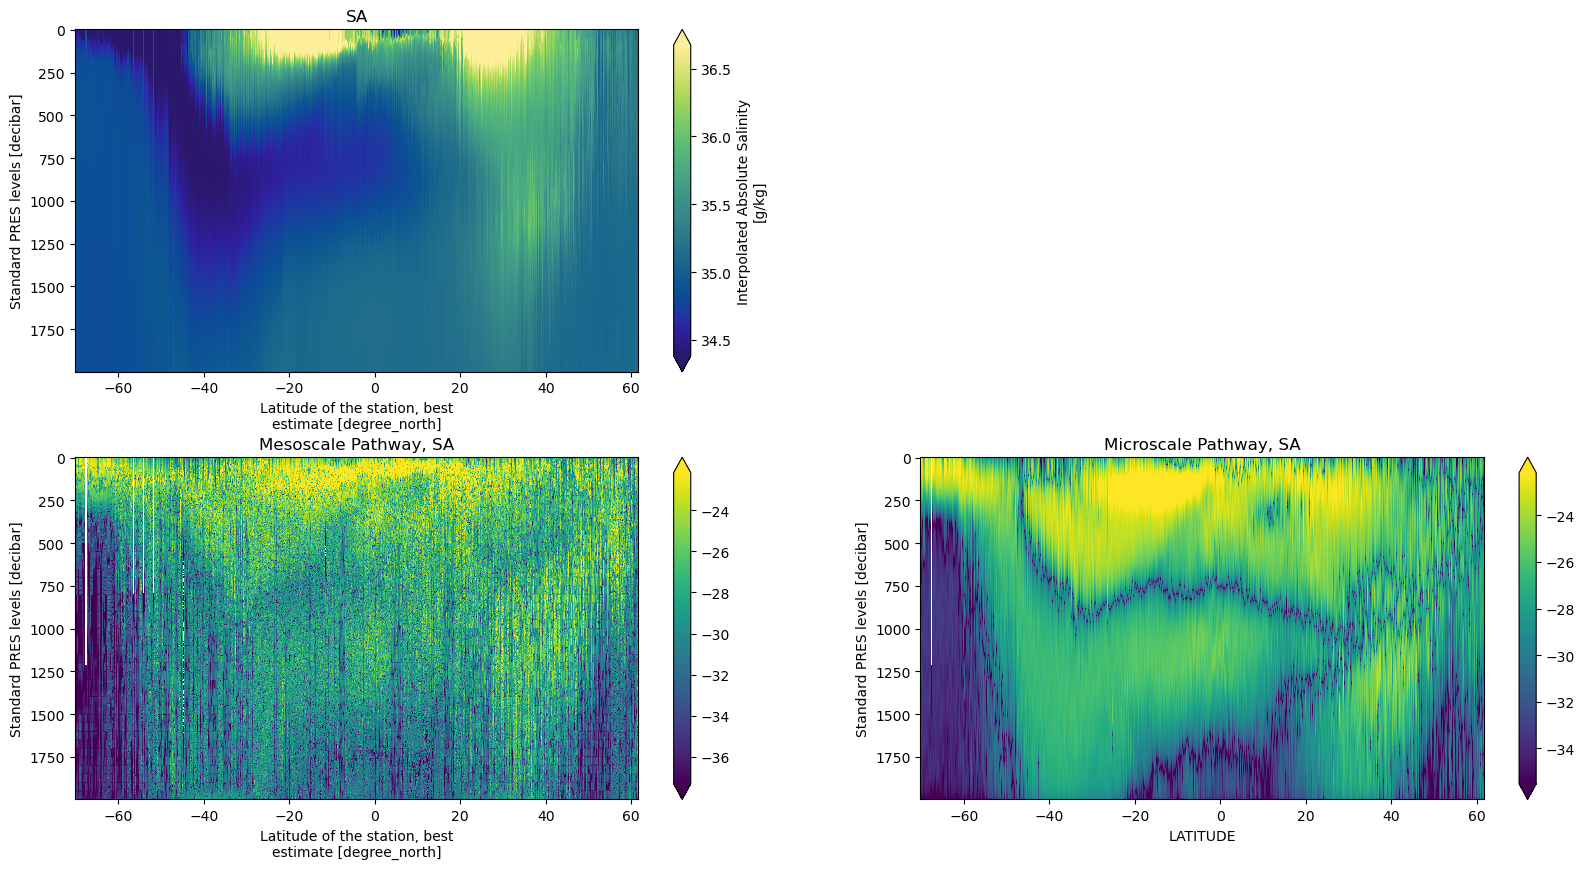

In [55]:
x='LATITUDE'
y='PRES_INTERPOLATED'

plt.figure(figsize=(20,10))

plt.subplot(221)
ds.SA.sortby(x).plot(x=x, y=y, cmap=cmo.haline, robust=True)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(223)
np.log(sa_2).sortby(x).plot(x=x, y=y, robust=True)
plt.gca().invert_yaxis()
plt.title('Mesoscale Pathway, SA')

plt.subplot(224)
np.log(sa_3).sortby(x).plot(x=x, y=y, robust=True)
plt.gca().invert_yaxis()
plt.title('Microscale Pathway, SA')

plt.subplots_adjust(hspace=0.25)

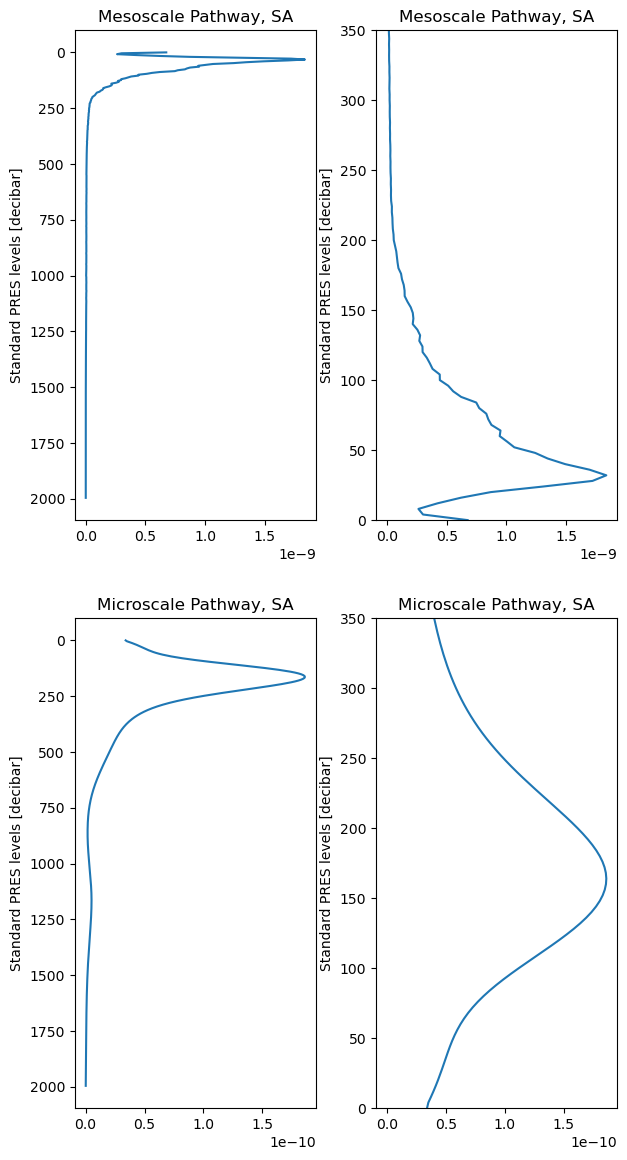

In [52]:
plt.figure(figsize=(7,14))

plt.subplot(221)
sa_2.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.title('Mesoscale Pathway, SA')

plt.subplot(222)
sa_2.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.ylim(0,350)
plt.title('Mesoscale Pathway, SA')

plt.subplot(223)
sa_3.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.title('Microscale Pathway, SA')

plt.subplot(224)
sa_3.mean('N_PROF').plot(y=y)
plt.gca().invert_yaxis()
plt.ylim(0,350)
plt.title('Microscale Pathway, SA')

plt.subplots_adjust(wspace=0.25)

TO DO NEXT:
- check units, compare order of magnitude with papers
- try horizontal averaging, maybe 2deg bins?
- make similar plots to Castro, pick profiles in the same places and over the same depth range
- mkae similar plots to Ferrari & Polzin
- averaging: does <C>=C_m?? look at the paper to see if they mention this; what about theta_t within angle brackets vs within angle brackets and under tilde?
- for term 2: should be filtered again to keep only the large scale from the filter
- add isopycnals to compare water mass locations
- 1750 20S: look at colorscale or look at profiles to compare salinity to its gradient
- inflection point in temp: does using potential temperature change this?
- add both together, plot the fraction for each; ALSO try computing x, compare does x look similar to the sum?
  - keep in mind the whole discussion from Steinberg about extra terms when computing the variance of a tracer